In [50]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

Data Exploration:

In [10]:
df=pd.read_csv(r'C:\Users\Sanket.Pawar\Downloads\Dataset_Sanket\online_retail.csv')

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.shape

(541909, 8)

Data Cleaning:

In [15]:
pd.isnull(df).sum() # not delete null values as its usefull for analysis (Description,CustomerID)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
df.shape

(541909, 8)

In [18]:
# check duplicate rows
duplicate_rows=df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country  
517     01-12-201

In [20]:
# Get the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]
print("Number of Duplicate Rows:", num_duplicate_rows)

Number of Duplicate Rows: 5268


In [22]:
df.shape

(541909, 8)

Data Transformation:

In [24]:
# Create a new column for total price
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [28]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
# Group data by customer ID and calculate total spending per customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

In [34]:
print(customer_spending.head(10))

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
12352.0    1545.41
12353.0      89.00
12354.0    1079.40
12355.0     459.40
12356.0    2811.43
Name: TotalPrice, dtype: float64


In [36]:
# sort_values
customer_spending_sorted = customer_spending.sort_values(ascending=False)
print(customer_spending_sorted.head(5))

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: TotalPrice, dtype: float64


Feature Engineering:

In [38]:
# Extract month from 'InvoiceDate' column
df['Month'] = df['InvoiceDate'].dt.month

In [40]:
# Create a new feature for weekday/weekend
df['Weekday'] = df['InvoiceDate'].dt.dayofweek < 5

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,1,True
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,1,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,1,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,1,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,1,True


In [44]:
# Display specific rows
print(df[['InvoiceDate', 'Month', 'Weekday']].head(10))

          InvoiceDate  Month  Weekday
0 2010-01-12 08:26:00      1     True
1 2010-01-12 08:26:00      1     True
2 2010-01-12 08:26:00      1     True
3 2010-01-12 08:26:00      1     True
4 2010-01-12 08:26:00      1     True
5 2010-01-12 08:26:00      1     True
6 2010-01-12 08:26:00      1     True
7 2010-01-12 08:28:00      1     True
8 2010-01-12 08:28:00      1     True
9 2010-01-12 08:34:00      1     True


In [46]:
# Check unique values in the 'Month' column
print("Unique Months:", df['Month'].unique())

# Check unique values in the 'Weekday' column
print("Unique Weekdays:", df['Weekday'].unique())

Unique Months: [ 1  2  3  5  6  7  8  9 10 12  4 11]
Unique Weekdays: [ True False]


Analysis

In [53]:
# Summary statistics for numerical columns
print(df.describe())

            Quantity      UnitPrice     CustomerID     TotalPrice  \
count  541909.000000  541909.000000  406829.000000  541909.000000   
mean        9.552250       4.611114   15287.690570      17.987795   
std       218.081158      96.759853    1713.600303     378.810824   
min    -80995.000000  -11062.060000   12346.000000 -168469.600000   
25%         1.000000       1.250000   13953.000000       3.400000   
50%         3.000000       2.080000   15152.000000       9.750000   
75%        10.000000       4.130000   16791.000000      17.400000   
max     80995.000000   38970.000000   18287.000000  168469.600000   

               Month  
count  541909.000000  
mean        6.919828  
std         3.363659  
min         1.000000  
25%         4.000000  
50%         7.000000  
75%        10.000000  
max        12.000000  


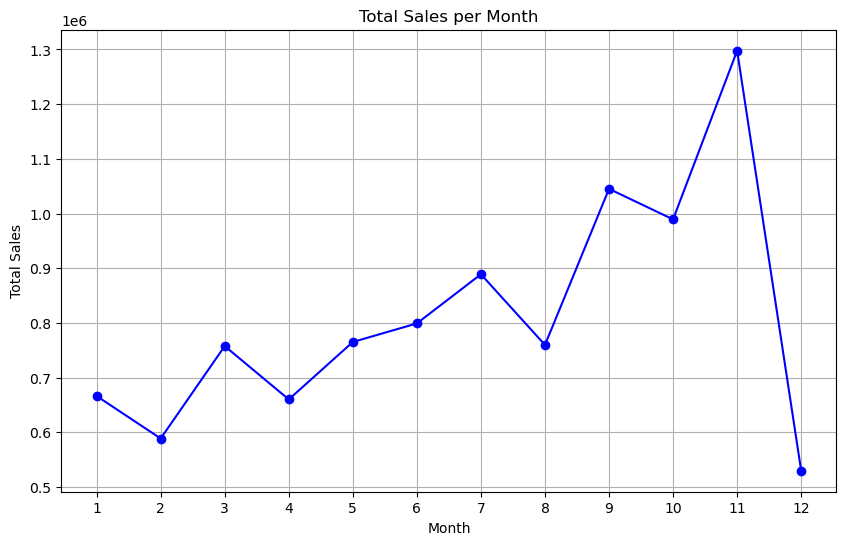

In [63]:
# Plotting highest sales on a month-wise basis
plt.figure(figsize=(10, 6)) 
df.groupby('Month')['TotalPrice'].sum().plot(marker='o', color='blue')  # Plot total sales for each month
plt.xlabel('Month') 
plt.ylabel('Total Sales')  
plt.title('Total Sales per Month')  # Set the title of the plot
plt.xticks(range(1, 13))  # Set ticks for all months
plt.grid(True)  # Add grid lines for better readability
plt.show() 

creating connection to mysql:

In [65]:
# Import necessary libraries:
import mysql.connector
from sqlalchemy import create_engine

In [67]:
# Connect to your MySQL database:
# MySQL connection details
hostname = 'localhost'
username = 'root'
password = 'Nobbiboy'
database_name = 'database_etl'

# Create MySQL connection
connection = mysql.connector.connect(
    host=hostname,
    user=username,
    password=password,
    database=database_name
)

In [69]:
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}/{database_name}')

In [70]:
table_name = 'online_retail'

df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

541909